In [28]:
import nibabel as nb
from nilearn import plotting
from nilearn.plotting import plot_epi
from nilearn.image.image import mean_img
import matplotlib.pyplot as plt
from nilearn.image import index_img

In [29]:
part_id = "sub-NDARINV5BF7P17A" #"sub-NDARINV35E15ZE0" #"sub-NDARINV3HU0G71U" "sub-NDARINV5BF7P17A"
folder = f"/mnt/storage/failed_roi/raw_files/{part_id}/ses-baselineYear1Arm1/"
func_file = folder + f"func/{part_id}_ses-baselineYear1Arm1_task-sst_run-01_bold.nii"
anat_file = folder + f"anat/{part_id}_ses-baselineYear1Arm1_run-01_T1w_brain.nii.gz"

In [30]:
proc_folder = f"/mnt/storage/failed_roi/{part_id}_ses-baselineYear1Arm1_task-sst_run-02LN.feat/"

In [31]:
func_img = nb.load(func_file)
func_img.get_fdata().shape

(90, 90, 60, 445)

plot_epi(mean_img(func_img), colorbar=True, cbar_tick_format="%i")
plt.show()

/tmp/ipykernel_545278/3344522484.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  plotting.plot_glass_brain(mean_img(func_img), colorbar=True, cbar_tick_format="%i")


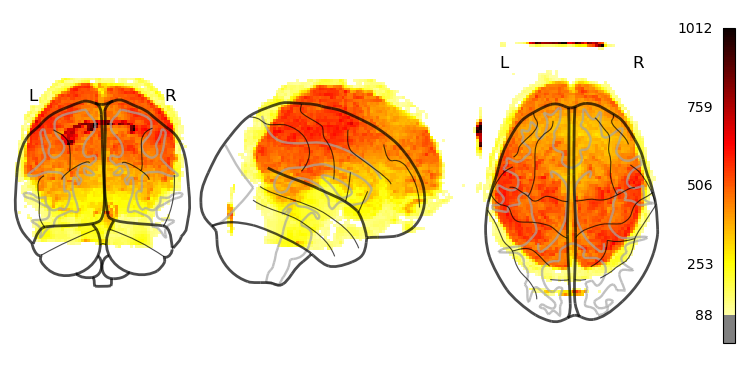

In [32]:
plotting.plot_glass_brain(mean_img(func_img), colorbar=True, cbar_tick_format="%i")
plt.show()

plotting.plot_glass_brain(index_img(func_img,0), colorbar=True, cbar_tick_format="%i")
plt.show()

In [33]:
anat_img = nb.load(anat_file)
anat_img.get_fdata().shape

(256, 256, 256)

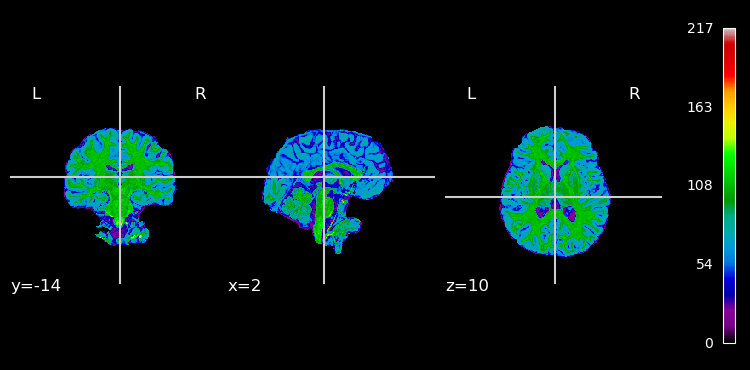

In [34]:
plot_epi(anat_img, colorbar=True, cbar_tick_format="%i")
plt.show()

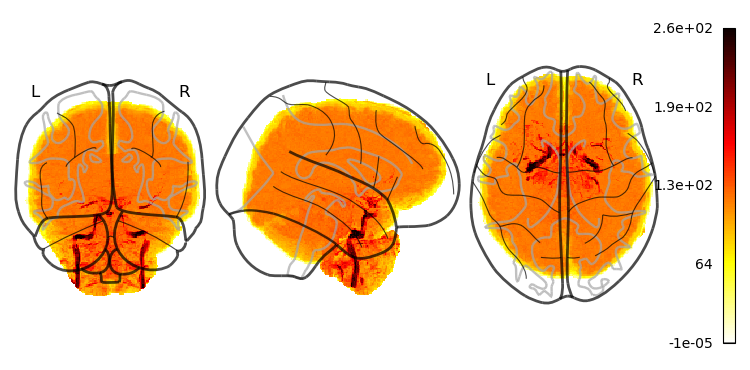

In [35]:
plotting.plot_glass_brain(
    anat_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

In [36]:
example_file = proc_folder + "reg/example_func.nii.gz"
example_to_highres_file = proc_folder + "reg/example_func2highres.nii.gz"
reg_highres_to_stand_file = proc_folder + "reg/highres2standard.nii.gz"
reg_example_to_stand_file = proc_folder + "reg/example_func2standard.nii.gz"

example_img = nb.load(example_file)
example_to_highres_img = nb.load(example_to_highres_file)
reg_highres_to_stand_img = nb.load(reg_highres_to_stand_file)
reg_example_to_stand_img = nb.load(reg_example_to_stand_file)
example_img.get_fdata().shape

(90, 90, 60)

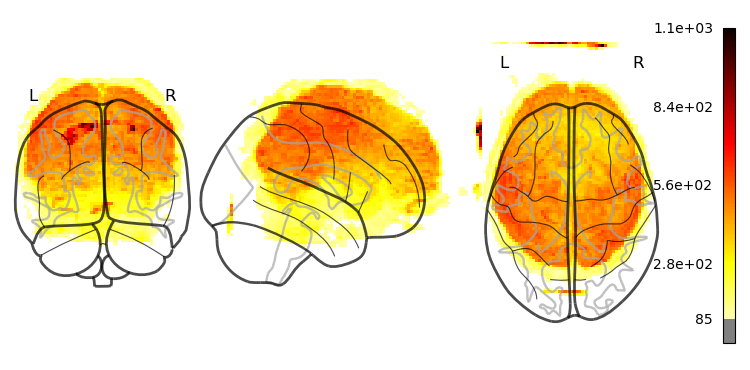

In [37]:
plotting.plot_glass_brain(
    example_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

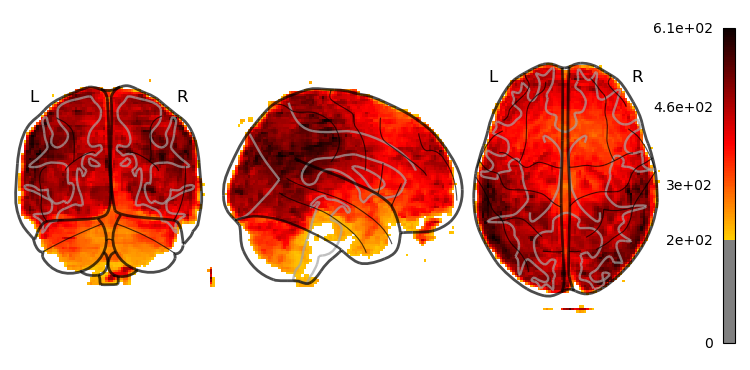

In [38]:
plotting.plot_glass_brain(
    reg_example_to_stand_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()


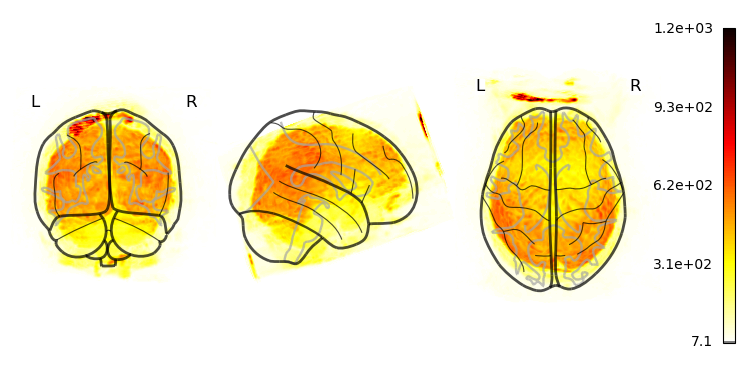

In [39]:
plotting.plot_glass_brain(
    example_to_highres_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

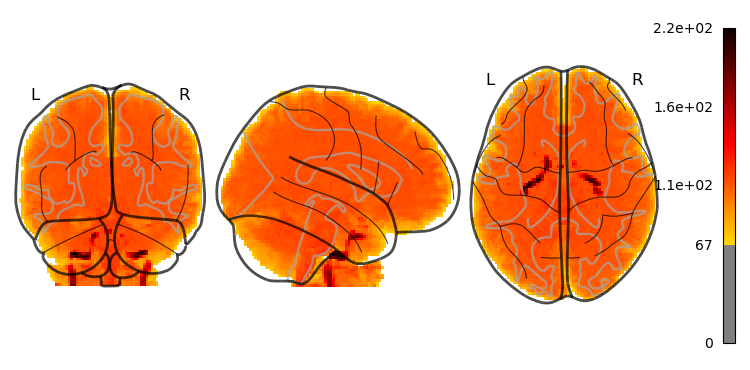

In [40]:
plotting.plot_glass_brain(
    reg_highres_to_stand_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()


In [41]:
#import polars as pl

In [42]:
#df_failed = pl.read_excel("/mnt/storage/failed_roi/failed_evs.xlsx")
#df_failed

In [43]:
pe1_file = proc_folder + "stats/pe1.nii.gz"
stat1_file = proc_folder + "stats/zfstat1.nii.gz"
stat3_file = proc_folder + "stats/zfstat3.nii.gz"
stat1_LN_file = proc_folder + "stats/zfstat1_LN.nii.gz"
stat3_LN_file = proc_folder + "stats/zfstat3_LN.nii.gz"

pe1_img = nb.load(pe1_file)

stat1_img = nb.load(stat1_file)
reg_stat1_LN_img = nb.load(stat1_LN_file)

stat3_img = nb.load(stat3_file)
reg_stat3_LN_img = nb.load(stat3_LN_file)

In [44]:
stat1_file

'/mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/stats/zfstat1.nii.gz'

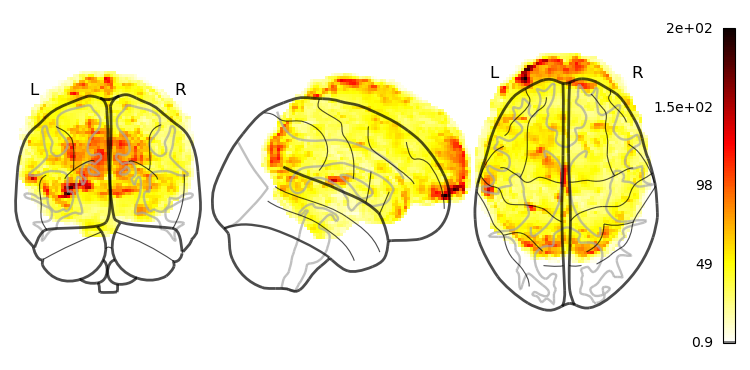

In [45]:
plotting.plot_glass_brain(
    pe1_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

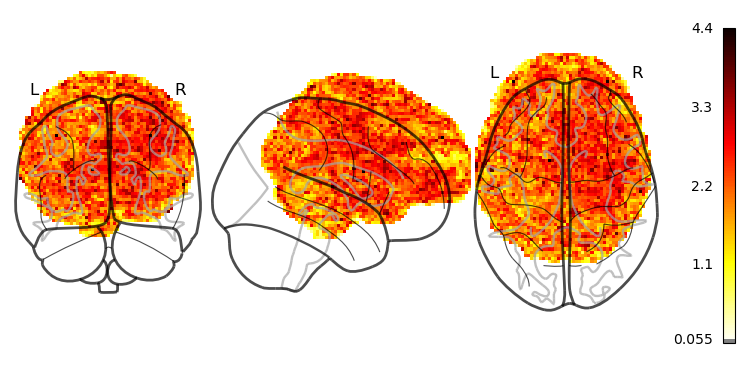

In [46]:
plotting.plot_glass_brain(
    stat1_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

plotting.plot_glass_brain(
    reg_stat3_LN_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

In [47]:
proc_folder

'/mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/'

In [48]:
stat1_out_file = proc_folder + "stats/zfstat1_ritesh_test.nii.gz"

ln_command = f"/usr/local/fsl/bin/flirt -ref {proc_folder}reg/standard -in {stat1_file} -out {stat1_out_file} -applyxfm -init {proc_folder}reg/example_func2standard.mat -interp trilinear"
ln_command

'/usr/local/fsl/bin/flirt -ref /mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/reg/standard -in /mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/stats/zfstat1.nii.gz -out /mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/stats/zfstat1_ritesh_test.nii.gz -applyxfm -init /mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/reg/example_func2standard.mat -interp trilinear'

In [ ]:
import os
##subprocess.check_output(['ls', '-l'])  # All that is technically needed...
#print(os.system(ln_command))


0


In [53]:
stat1_out_file

'/mnt/storage/failed_roi/sub-NDARINV5BF7P17A_ses-baselineYear1Arm1_task-sst_run-02LN.feat/stats/zfstat1_ritesh_test.nii.gz'

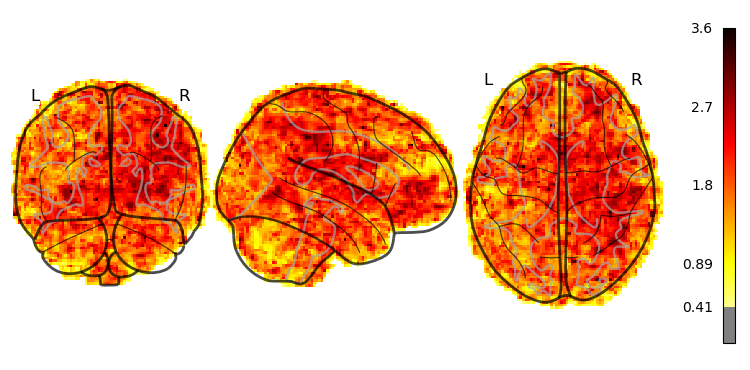

In [ ]:
stat1_LN_test_img = nb.load(stat1_out_file)

plotting.plot_glass_brain(
    stat1_LN_test_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

stat1_out_orig_meth_file = proc_folder + "stats/zfstat1_ritesh_orig_method.nii.gz"
ln_command_2 = f"/usr/local/fsl/bin/flirt -ref /usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz -in {stat1_file} -out {stat1_out_orig_meth_file} -applyxfm -init {proc_folder}reg/example_func2standard.mat -interp trilinear -paddingsize 0.0"
#print(os.system(ln_command_2))


stat1_LN_orig_img = nb.load(stat1_out_orig_meth_file)

plotting.plot_glass_brain(
    stat1_LN_orig_img, display_mode="ortho",colorbar=True,#, title="plot_stat_map", cut_coords=[26, -27, 66], display_mode="z", colorbar=True, annotate=True
)
plt.show()

cmd_run01 = (f"/usr/local/fsl/bin/flirt -in {parent_folder}/{epi_file_name}.nii.gz " +
                    f"-applyxfm -init {parent_folder}/reg/example_func2standard.mat " +
                    f"-out {parent_folder}/reg/{epi_file_name}LN -paddingsize 0.0 -interp trilinear "+
                    f"-ref /usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz")